# 第6部　一般化線形モデル｜Pythonで学ぶ統計学入門

## 3章　ロジスティック回帰

### 分析の準備

In [2]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ(ワーニングが出ることもあります)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline


### 実装：データの読み込みと図示

In [3]:
# データの読み込み
test_result = pd.read_csv("6-3-1-logistic-regression.csv")
print(test_result.head(3))

   hours  result
0      0       0
1      0       0
2      0       0


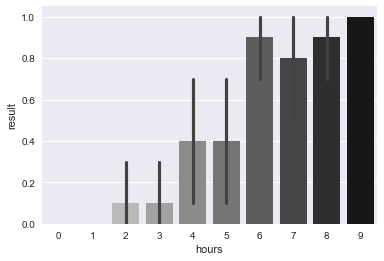

In [4]:
# データの図示
sns.barplot(x = "hours",y = "result", 
            data = test_result, palette='gray_r')

In [5]:
# 勉強時間ごとの合格率
print(test_result.groupby("hours").mean())

       result
hours        
0         0.0
1         0.0
2         0.1
3         0.1
4         0.4
5         0.4
6         0.9
7         0.8
8         0.9
9         1.0


### 実装：ロジスティック回帰

In [6]:
# モデル化
mod_glm = smf.glm(formula = "result ~ hours", 
                  data = test_result, 
                  family=sm.families.Binomial()).fit()

In [7]:
# 参考：リンク関数を指定する
logistic_reg = smf.glm(formula = "result ~ hours", 
                       data = test_result, 
                       family=sm.families.Binomial(link=sm.families.links.logit)).fit()

### 実装：ロジスティック回帰の結果の出力

In [8]:
# 結果の出力
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 result   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -34.014
Date:                Thu, 15 Mar 2018   Deviance:                       68.028
Time:                        15:27:16   Pearson chi2:                     84.9
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5587      0.901     -5.061      0.000      -6.324      -2.793
hours          0.9289      0.174      5.345      0.000       0.588       1.270
==============================================================================
"""

### 実装：AICによるモデル選択

In [9]:
# Nullモデル
mod_glm_null = smf.glm(
    "result ~ 1", data = test_result, 
    family=sm.families.Binomial()).fit()

In [11]:
# AICの比較
print("Nullモデル　：", mod_glm_null.aic.round(3))
print("変数入りモデル：", mod_glm.aic.round(3))

Nullモデル　： 139.989
変数入りモデル： 72.028


### 実装：ロジスティック回帰曲線の図示

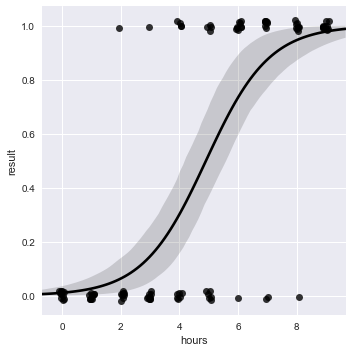

In [23]:
# lmplotでロジスティック回帰曲線を図示する
sns.lmplot(x = "hours", y = "result",
           data = test_result, 
           logistic = True,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"},
           x_jitter = 0.1, y_jitter = 0.02)

### 実装：成功確率の予測

In [26]:
# 0~9まで1ずつ増える等差数列
exp_val = pd.DataFrame({
    "hours": np.arange(0, 10, 1)
})
# 成功確率の予測値
pred = mod_glm.predict(exp_val)
pred

0    0.010367
1    0.025836
2    0.062920
3    0.145291
4    0.300876
5    0.521427
6    0.733929
7    0.874741
8    0.946467
9    0.978147
dtype: float64

### ロジスティック回帰の係数とオッズ比の関係

In [39]:
# 勉強時間が1時間の時の合格率
exp_val_1 = pd.DataFrame({"hours": [1]})
pred_1 = mod_glm.predict(exp_val_1)

# 勉強時間が2時間の時の合格率
exp_val_2 = pd.DataFrame({"hours": [2]})
pred_2 = mod_glm.predict(exp_val_2)

In [43]:
# オッズ
odds_1 = pred_1 / (1 - pred_1)
odds_2 = pred_2 / (1 - pred_2)

# 対数オッズ比
sp.log(odds_2 / odds_1)

array([ 0.929])

In [48]:
# 係数
mod_glm.params["hours"]

0.929

In [47]:
# 補足：オッズ比に戻す
sp.exp(mod_glm.params["hours"])

2.532